# Sentiment Analysis Practice !

In [4]:
# import field

import pandas as pd
import numpy as np

In [12]:
# data load


# 첫 번째 시도: 'latin1' 인코딩 사용
try:
    print('latin1 encoding')
    df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1', header = None)
except UnicodeDecodeError:
    # 두 번째 시도: 'ISO-8859-1'
    try:
        print('ISO-8859-1 encoding')
        df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header = None)
    except UnicodeDecodeError:
        # 세 번째 시도
        print('그냥 오류 무시')
        df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='utf-8', errors='ignore', header = None)

df.head()

latin1 encoding


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
# text 처리
# negative 먼저 

from nltk.corpus import stopwords
import re
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def process_text(text):
    # 텍스트 소문자로 변환
    text = text.lower()
    # 특수문자, 숫자 제거
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['processed_text'] = df[5].apply(process_text)
df.head()

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,processed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com 2y1zl awww bummer ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   0               1600000 non-null  int64 
 1   1               1600000 non-null  int64 
 2   2               1600000 non-null  object
 3   3               1600000 non-null  object
 4   4               1600000 non-null  object
 5   5               1600000 non-null  object
 6   processed_text  1600000 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [22]:
# 0 2 4 분리
df_0 = df[df[0] == 0]
df_2 = df[df[0] == 2]
df_4 = df[df[0] == 4]

print(f'{df_0.shape, df_2.shape, df_4.shape}')

((800000, 7), (0, 7), (800000, 7))


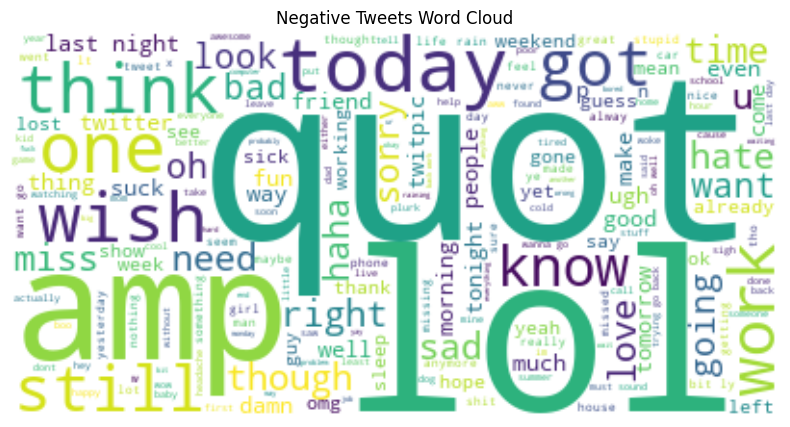

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# negative plot 찍어보기
negative_words = ' '.join(df_0['processed_text']).split()

# 워드 클라우드 생성 함수
def generate_wordcloud(text, title):
    wordcloud = WordCloud(max_words=200, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")

# 부정적 플롯 생성
generate_wordcloud(negative_words, 'Negative Tweets Word Cloud')

# 통합

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


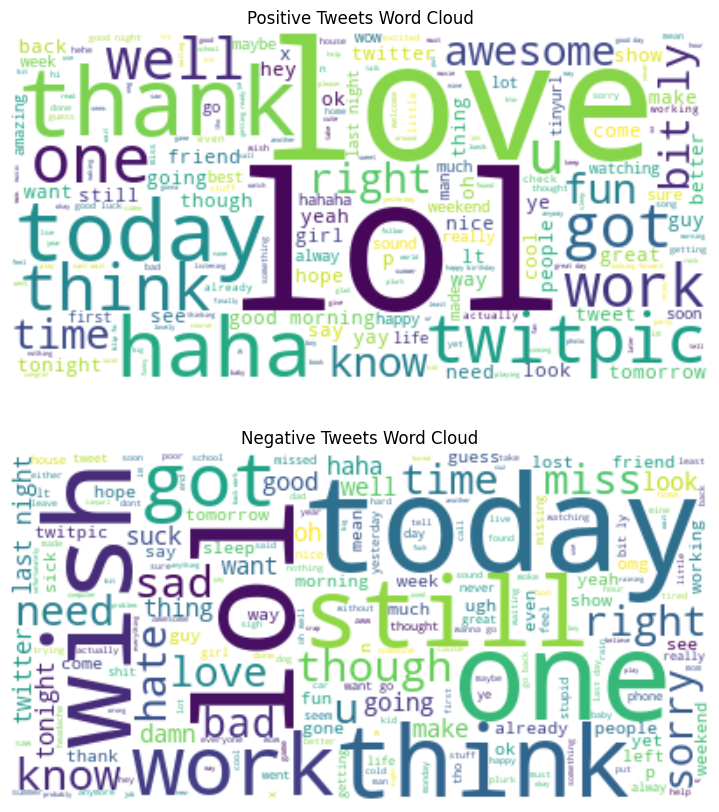

In [45]:
# import field
from nltk.corpus import stopwords
import re
import nltk
import pandas as pd
import numpy as np

### data load
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1', header = None)

### process text

# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update({'quot', 'amp'})

def process_text(text):
    # 텍스트 소문자로 변환
    text = text.lower()
    # 특수문자, 숫자 제거
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # 불용어 제거 => ' '으로 구분된 통 스트링
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# processed_text 컬럼 생성
df['processed_text'] = df[5].apply(process_text)

### 워드 클라우드 

# 각각의 워드 클라우드 생성
negative_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(df[df[0] == 0]['processed_text']))
positive_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(df[df[0] == 4]['processed_text']))

# plot
plt.figure(figsize=(20,10))
# positive plot
plt.subplot(2,1,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis("off")
# negative plot
plt.subplot(2,1,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()